<a href="https://colab.research.google.com/github/KLeeDE/Data-Science/blob/master/Sea%20level%20rise%3A%20projections%20for%20the%20future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPP // Assignment #2 **(GGD: Total = 85 / 90)**

assigned : **Feb 20, 2020**

DUE : **Feb 26, 2020 11:59pm**

## Sea level rise: projections for the future

<img src="https://cdn.viewing.nyc/assets/media/5c0dcd07e43c85f0ad421ed09f21df33/elements/08ebcd75071c8e4d673147698fbbdcdd/xl/cce6b621-11a3-4f0d-8a53-fccdb6457875_2x.png" width=500>

---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected.

Measurements of sea level mostly come in two flavors, satellites and tide gauges.  The satellite measurements are primarily accomplished by firing radio waves towards the ocean surface and waiting for the time it takes for those radio waves to bounce back and return to the satellite.  Since we know how fast light (radio waves are a form of light) travels, the distance from the satellite to the surface is just the bounce back time divided by the speed of light.  [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) has been one of the most successful satellite missions for these altimetry measurements of the ocean surface.  [Tide gauges](https://en.wikipedia.org/wiki/Tide_gauge), on the other hand, are ground-based measurements that directly measure the height of water relative to a stationary device.  They are less accurate, provide significantly reduced spatial coverage, but prior to satellite altimetry, were the only real method for measuring sea level. 

There are three main goals of this assignment:

1. you will apply linear regression models to satellite data using Stochastic Gradient Descent
2. you will evaluate the goodness-of-fit of these models via $\chi^2$ per degree-of-freedom
3. you will compare linear models using data covering different time scales and make projections for future sea levels

<b>

Rules for homeworks:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed at the top of this notebook.  Direct copying from someone else's notebook is not permitted.

2. Late homeworks will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

### PART 1 - Background **(GGD: +10)**

Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>
<u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of sea level rise, including its historical significance, context within a changing climate, and projections for the future.  Potential topics to consider and address include:

1. description of historical sea level measurements
  
2. what open satellite data exist and where they can be located

3. characteristic numbers for sea level measurements over time

4. why sea level might change as the climate changes

5. what projections exist for the future of sea level rise

6. on what those projections depend and the consequences for various scenarios

Please include *references* within the description via weblinks (like the TOPEX/Poseidon link in the Overview in the cell above).
</b>

**1. Description of historical sea level measurements**
In the past during 100 years, the measurements for gauging sea level has been developed from tide gauge to satellite based on tehcnology development. According to the  [Intergovernmental Panel on Climate Change (IPCC)](https://en.wikipedia.org/wiki/Intergovernmental_Panel_on_Climate_Change), “the instrumental record of sea level change is mainly comprised of tide gauge measurements over the past two to three centuries and, since the early 1990s, of satellite-based radar altimeter measurements” [(IPCC, 2014)](https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter13_FINAL.pdf). In 18th century, the sea level observations come from tide gauge records [(Gornitz, 1995](https://link.springer.com/article/10.1007/BF01095160); [Douglas et al, 2000](https://books.google.com/books?hl=en&lr=&id=DcXZF9vogtkC&oi=fnd&pg=PP1&dq=sea+level+measurement+history&ots=Yjjj4bnGqJ&sig=dAvLeVEZDmlG4dnd8RzZtVlk-h4#v=onepage&q=history&f=false)). As the technology has been developed, the sea level measurements has been changed to use satellite, specifically [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) is known as the first major oceanographic research satellite launched by US and France 1992. The advantage of tide gauge data, comparing to satellite data, is that it offers a longer record and finer temporal resolution but coarser spatial resolution. However, there is also disadvantage that "the calculation of global mean sea level from tide gauges is not stratightforward due to a number of considerations including local and regional changes in winds and ocean circulation that impacts sea level, the impact of atmospheric pressure changes on sea level, the relative lack of long, continuous records, and the lack of a common datum across tide gauge sites" ([National Center for Atmospheric Research [NCAR], 2020](https://climatedataguide.ucar.edu/climate-data/tide-gauge-sea-level-data)).   

**2. What open satellite data exist and where they can be located**
The open data is provided in public sector, private sector, academia, and individual sources, which can be useful sources in terms of accessibility. Particularly, satellite data can be found in public sector because of governmental production and supervision. The sea level data are measured by satellites such as TOPEX/Poseidon, [Jason-1](https://en.wikipedia.org/wiki/Jason-1), [OSTM/Jason-2](https://en.wikipedia.org/wiki/OSTM/Jason-2), and [Jason-3](https://en.wikipedia.org/wiki/Jason-3), which are owned by government; therefore, the data can be usually found in the public sector. In case of measuring the sea level, the open data measured by TOPEX/Poseidon or others can be usually found in the public open data source such as [U.S. Government Open Data Portal](https://catalog.data.gov/dataset/sea-level-topex-poseidon), or [NASA’s Open Data Portal](https://data.nasa.gov/Earth-Science/SEA-LEVEL-TOPEX-POSEIDON-/fxn4-cuhe). The related data can be found in other websites such as [NCAR](https://climatedataguide.ucar.edu/climate-data) climate data and [CSIRO](https://www.cmar.csiro.au/sealevel/sl_hist_last_decades.html) data.

**3. Characteristic numbers for sea level measurements over time**
The characteristic numbers for sea level measurements are changed over time.  [Cazenave and Nerem (2004)](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2003RG000139) estimated that “the geocentric rate of global mean sea level rise over the last decade (1993-2003) is known to be +2.8±0.4 mm/yr” by using the TOPEX/Poseidon and Jason altimeter measurements. However, the characteristic numbers for sea level measurements has been changed up to 0.8 mm/yr sea level rise because of thermal expansion and total ice melting during 1990s. [Nerem et al. (2010)](https://www.tandfonline.com/doi/full/10.1080/01490419.2010.491031) also found that “the average rate of sea level rise from 1993-2009 is 3.4±0.4 mm/yr” by using the TOPEX/Poseidon and Jason-1 and 2 satellite altimeter missions. [Nerem and Mitchum (2002)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2002GL015037) also found that the rate of vertical crustal motion from differences of sea level measurements made by the TOPEX/Poseidon radar altimeter and a globally distributed network of 114 tide gauges are approximately 1-2 mm/yr, which is sufficiently accurate to detect a geophysical phenomenon. Based on the previous research, the characteristic numbers for sea level measurements are found to be changed by time, even the measurements are same. 

**4. Why sea level might change as the climate changes**
IPCC (2014) showed a scientific consensus that climate is changing mainly caused by human activities, and warming of the atmosphere and oceans caused loss of snow and ice, and eventually sea level rise. [NASA website](https://climate.nasa.gov/vital-signs/sea-level/) shows diverse level based on satellite data such as carbon dioxide, gloabal temperature, arctic sea ice minimum, ice sheets, and sea level. Also, the previous research found that sea level changes as climate changes. The global climate change is expected to affect rate of rising sea level [(Michener et al., 1997)](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/1051-0761%281997%29007%5B0770%3ACCHATS%5D2.0.CO%3B2). Afterwards, [Cazenave and Nerem (2004)](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2003RG000139) stated that “changes in the rate of sea level rise are intimately related to changes in the Earth’s climate”.  It is because the climate change alters the volume of water in the global ocean and atmosphere and it caused the global mean sea level change [(Bindoff et al., 2007)](http://nora.nerc.ac.uk/id/eprint/15400/). Therefore, the sea level rise and climate change are closely related, and climate change is expected to affect the rate of sea level rise to be increased. 

**5. What projections exist for the future of sea level rise**
IPCC reports stated projections of global mean sea level rise (IPCC, 2014; IPCC, 2018). Ther is a projection exist for the future of sea level rise saying that "in all scenarios, the rate of rise at the start of the RCP projections (2007-2013) is about 3.7mm yr. Scientists estimated the projected contributions to global mean sea level and suggested projections of global mean sea level rise. According to the IPCC, AR5 mentioned that “it is very likely that the rate of global mean sea level rise during the 21st century will exceed the rate observed during 1971-2010 for all Representative Concentration Pathway (RCP) scenarios due to increase in ocean warming and loss of mass from glaciers and ice sheets” [(IPCC, 2014)](https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter13_FINAL.pdf). The IPCC’s projections are larger than what it was reported in the Fourth Assessment Report (AR4). In the future by 2100, “the global mean sea level rise is projected to be around 0.1 meter lower with global warming of 1.5°C compared to 2°C (medium confidence) and seal level will continue to rise well beyond 2100”  [(IPCC, 2018).](https://www.ipcc.ch/sr15/chapter/spm/) As a result, the sea level is expected to rise continuously and more rapidly than the current level. 

**6. on what those projections depend and the consequences for various scenarios**
IPCC (2018) presented four scenarios based on model pathways of contributions to global net CO2 emissions. The first scenario in which social, business and technological innovations result in lower energy demand up to 2050 shows a patayway of - 58% of CO2 emission change in 2030 relative to 2010. The second scenario with a broad focus on sustainability with limited societal acceptability for convention. The fourth resource- and energy- intensvie scenario in which economic growth and globalization lead to widespread adoption of greenhouse-gas intensive lifestyles shows a patayway of +4 CO2 emission change in 2030 relative to 2010. There are also [Representative Concentration Pathway (RCP)](https://en.wikipedia.org/wiki/Representative_Concentration_Pathway) about projections on sea level rise. 

*   RCP 2.6 assumes that global annual GHG emissions (measured in CO2 equivalents) peak between 2010-2020 with emissions declining substantially thereafter
*   RCP 4.5 assumes peak around 2040, and same then as above
*   RCP 6 assumes peak around 2080, and same then as above
*   RCP 8.5 assumes continuously rise throughout 21st centrury. 

According to the scenarios, the result shows that sea level rise is expected to be almost 1 meter (1,000 mm) by 2100 in all scenarios. The global mean sea lvel rise in 2100 is ranging from 0.44 m (440 mm) to 0.74 m (740mm).

![IPCC projection](https://k.kakaocdn.net/dn/cVARLR/btqCjdvzp7l/xECumS07KwEtsqMnH9Izpk/img.png)


![Projected sea level rise in meter](https://i0.wp.com/fabiusmaximus.com/wp-content/uploads/2019/05/Sea-Level-Rise-by-RCP.png?ssl=1)


**References:**

***Journal/Report***

Bindoff, N. L., Willebrand, J., Artale, V., Cazenave, A., Gregory, J. M., Gulev, S., ... & Shum, C. K. (2007). Observations: oceanic climate change and sea level. 

Bosello, F., Roson, R., & Tol, R. S. (2007). Economy-wide estimates of the implications of climate change: Sea level rise. Environmental and Resource Economics, 37(3), 549-571. Bosello, F., Nicholls, R. J., Richards, J., Roson, R., & Tol, R. S. (2012). Economic impacts of climate change in Europe: sea-level rise. Climatic change, 112(1), 63-81.

Cazenave, A., & Nerem, R. S. (2004). Present‐day sea level change: Observations and causes. Reviews of Geophysics, 42(3). Retrieved from: 

Church, J. A., & White, N. J. (2011). Sea-level rise from the late 19th to the early 21st century. Surveys in geophysics, 32(4-5), 585-602.

Douglas, B., Kearney, M. T., & Leatherman, S. P. (Eds.). (2000). Sea level rise: History and consequences. Elsevier.

Fankhauser, S. (1995). Protection versus retreat: the economic costs of sea-level rise. Environment and Planning A, 27(2), 299-319.

Gornitz, V. (1995). Monitoring sea level changes. Climatic Change, 31(2-4), 515-544.

Hurlimann, A., Barnett, J., Fincher, R., Osbaldiston, N., Mortreux, C., & Graham, S. (2014). Urban planning and sustainable adaptation to sea-level rise. Landscape and Urban Planning, 126, 84-93.

IPCC, 2014: Climate Change 2014: Synthesis Report. Contribution of Working Groups I, II and III to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change [Core Writing Team, R.K. Pachauri and L.A. Meyer (eds.)]. IPCC, Geneva, Switzerland.

IPCC, 2018: Summary for Policymakers. In: Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty [Masson-Delmotte, V., P. Zhai, H.-O. Pörtner, D. Roberts, J. Skea, P.R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, J.B.R. Matthews, Y. Chen, X. Zhou, M.I. Gomis, E. Lonnoy, T. Maycock, M. Tignor, and T. Waterfield (eds.)]. World Meteorological Organization, Geneva, Switzerland, 32 pp. 

Leatherman, S. P. (2001). Social and economic costs of sea level rise. In International Geophysics (Vol. 75, pp. 181-223). Academic Press.

Michener, W. K., Blood, E. R., Bildstein, K. L., Brinson, M. M., & Gardner, L. R. (1997). Climate change, hurricanes and tropical storms, and rising sea level in coastal wetlands. Ecological Applications, 7(3), 770-801.

Nerem, R. S., & Mitchum, G. T. (2002). Estimates of vertical crustal motion derived from differences of TOPEX/POSEIDON and tide gauge sea level measurements. Geophysical Research Letters, 29(19), 40-1.

Nerem, R. S., Chambers, D. P., Choe, C., & Mitchum, G. T. (2010). Estimating mean sea level change from the TOPEX and Jason altimeter missions. Marine Geodesy, 33(S1), 435-446.

***Website***

Burdett, Matt (2018, April 10) Societal impacts of climate change: Sea level rise. Retrieved from: https://geographycasestudysite.wordpress.com/societal-impacts-of-climate-change-sea-level-rise/

Dunham, Will (2016, March 14) Sea level rise projected to displace 13 million in U.S. by 2100. Retrieved from: https://www.reuters.com/article/us-climatechange-usa/sea-level-rise-projected-to-displace-13-million-in-u-s-by-2100-idUSKCN0WG1VW

Friedlander, Blaine (2017, June 19) Rising seas could result in 2 billion refugees by 2100. Retrieved from: https://news.cornell.edu/stories/2017/06/rising-seas-could-result-2-billion-refugees-2100

Intergovernmental Panel on Climate Change. (2020, January 14). In Wikipedia. Retrieved from:
https://en.wikipedia.org/wiki/Intergovernmental_Panel_on_Climate_Change

IPCC Fifth Assessment Report. (2020, January 14). In Wikipedia. Retrieved from: 
https://en.wikipedia.org/wiki/IPCC_Fifth_Assessment_Report

NASA Open Data Portal. https://data.nasa.gov/Earth-Science/SEA-LEVEL-TOPEX-POSEIDON-/fxn4-cuhe

NASA website. https://climate.nasa.gov/vital-signs/sea-level/

National Center for Atmospheric Research (NCAR). Retrieved 2/26/2020 from: https://climatedataguide.ucar.edu/climate-data/tide-gauge-sea-level-data

TOPEX/POSEIDON. (2020, January 14). In Wikipedia. Retrieved from: https://en.wikipedia.org/wiki/TOPEX/Poseidon

U.S. Government Open Data Portal. https://catalog.data.gov/dataset/sea-level-topex-poseidon


### PART 2 - Loading the data **(GGD: +5)**

In this assignment, we will be using several different data sets from the National Oceanic and Atmospheric Administration (NOAA).  In particular, we'll be looking at data from TOPEX as well as its follow on missions Jason-1, Jason-2, and Jason-3.  All of the data that you will be using is available [here](https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/LSA_SLR_timeseries.php).



<b>At the website in the previous cell, copy the link address of the global mean sea level csv file with seasonal signals removed from the "TOPEX, Jason-1, and Jason-2" column.  Load the data from this URL using pandas read_csv function (note, you'll have to skip the first 5 rows).</b> 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fname = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"
noaa = pd.read_csv(fname ,skiprows=5)

<b>Print the head of the DataFrame to get a sense of the contents.</b>

In [0]:
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992.9614,-19.54,NaN,NaN,NaN
1,1992.9865,-19.96,NaN,NaN,NaN
2,1993.0123,-15.62,NaN,NaN,NaN
3,1993.0407,-19.43,NaN,NaN,NaN
4,1993.0660,-23.95,NaN,NaN,NaN


### PART 3 - Aggregating and plotting the data **(GGD: +28)**

Notice that there are many NaN values (for a variety of reasons, but one big one is that the satellites were not all operating simultaneously).  Let's aggregate the data from all of the satellites so that we have one height for each timestamp.

<b>Take the maximum value across the three satellite columns and store it as another column within the DataFrame called "max_level".</b>

In [0]:
cols = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
noaa["max_level"] = noaa[cols].max(axis=1)
noaa

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9614,-19.54,NaN,NaN,NaN,-19.54
1,1992.9865,-19.96,NaN,NaN,NaN,-19.96
2,1993.0123,-15.62,NaN,NaN,NaN,-15.62
3,1993.0407,-19.43,NaN,NaN,NaN,-19.43
4,1993.0660,-23.95,NaN,NaN,NaN,-23.95
...,...,...,...,...,...,...
1226,2019.9988,NaN,NaN,NaN,64.44,64.44
1227,2020.0260,NaN,NaN,NaN,63.24,63.24
1228,2020.0532,NaN,NaN,NaN,60.86,60.86
1229,2020.0749,NaN,NaN,NaN,62.71,62.71


<b>Plot this maximum sea level as a function of year using a black line of linewidth 0.5.$^{\dagger}$  Remember to ALWAYS label your axes, including units in square brackets when necessary. (GGD: -1 [should indicate that sea level is relative to 2000 in y label])</b>

<small>$^{\dagger}$ you can use plt.plot? to see the keywords associated with the plot function; there are <u>many</u> ways to customize plots.</small>

Text(0.5, 1.0, 'Global mean sea level from TOPEX/Poseidon, Jason-1, Jason-2, and Jason-3 (Based on 2000)')

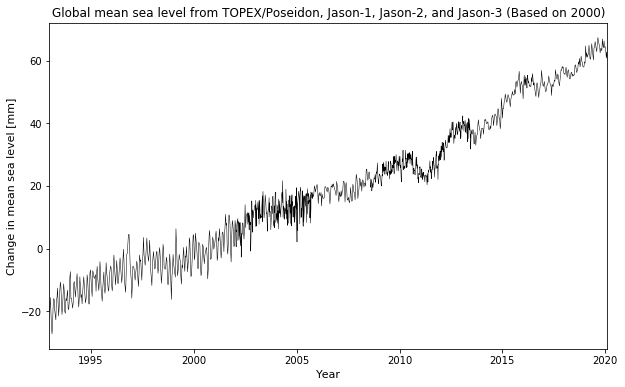

In [0]:
ax = noaa.plot("year", "max_level", legend=False, figsize=[10, 6], color="black", linewidth=0.5)
xlab = ax.set_xlabel("Year", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [mm]", fontsize=11)
plt.title("Global mean sea level from TOPEX/Poseidon, Jason-1, Jason-2, and Jason-3 (Based on 2000)", fontsize=12)

Let's compare this global value to values at smaller spatial scales.

<b>In the same way that you loaded the global data with seasonal effects removed, load in data for the Pacific Ocean, the Atlantic Ocean, the Indian Ocean, and the Southern Ocean (each in its own DataFrame), and for each of these new DataFrames, create a "max_level" column that is the max sea level .</b>

In [0]:
fname1 = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_pac_free_txj1j2_90.csv"
pacific = pd.read_csv(fname1 ,skiprows=5)
cols1 = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
pacific["max_level"] = pacific[cols1].max(axis=1)
pacific.head()


fname2 = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_atl_free_txj1j2_90.csv"
atlantic = pd.read_csv(fname2 ,skiprows=5)
cols2 = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
atlantic["max_level"] = atlantic[cols2].max(axis=1)
atlantic.head()

fname3 = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_ind_free_txj1j2_90.csv"
indian = pd.read_csv(fname3, skiprows=5)
cols3 = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
indian["max_level"] = indian[cols3].max(axis=1)
indian.head()

fname4 = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_so_free_txj1j2.csv"
southern = pd.read_csv(fname4, skiprows=5)
cols4 = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
southern["max_level"] = southern[cols4].max(axis=1)
southern.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9612,-24.33,NaN,NaN,NaN,-24.33
1,1992.9865,-20.05,NaN,NaN,NaN,-20.05
2,1993.0122,-12.03,NaN,NaN,NaN,-12.03
3,1993.0406,-21.17,NaN,NaN,NaN,-21.17
4,1993.0659,-27.22,NaN,NaN,NaN,-27.22


<b>Plot all of the max sea level data in a different color on the same plot using linewidth 0.2.  Plot the global line last in black using a linewidth of 0.5.  Add a legend to the plot by using the label keyword inside the plot function and the ax.legend function. (GGD: -1 [global line should be black and last])</b>

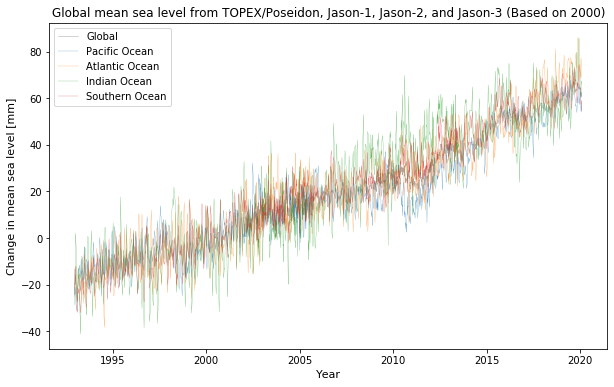

In [0]:
fig, ax = plt.subplots(figsize=[10,6])
txt1 = "Global"
ax.plot(noaa["year"], noaa["max_level"], color="darkgrey", linewidth=0.5, label=txt1)
txt2 = "Pacific Ocean"
ax.plot(pacific["year"], pacific["max_level"], linewidth=0.2, label=txt2)
txt3 = "Atlantic Ocean"
ax.plot(atlantic["year"], atlantic["max_level"], linewidth=0.2, label=txt3)
txt4 = "Indian Ocean"
ax.plot(indian["year"], indian["max_level"], linewidth=0.2, label=txt4)
txt5 = "Southern Ocean"
ax.plot(southern["year"], southern["max_level"], linewidth=0.2, label=txt5)

xlab = ax.set_xlabel("Year", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [mm]", fontsize=11)
plt.title("Global mean sea level from TOPEX/Poseidon, Jason-1, Jason-2, and Jason-3 (Based on 2000)", fontsize=12)
ax.legend()

<b>Describe the plot above.  What can you conclude about the variability of sea level rise across the globe?</b>

*The variablity of global sea level [mm] is rising continuously from 1992 to 2020. As the graph shown above, the sea level [mm] rise of main oceans, including the Pacific Ocean, the Atlantic Ocean, the Indian Ocean, and the Southern Ocean, is also continuously increasing during the same period.*

This data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

***Read me***

*Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.*

*This data contains “cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements and recent satellite measurements. It shows average absolute sea level change, which refers to the height of the ocean surface, regardless of whether nearby land is rising or falling. Satellite data are based solely on measured sea level, while the long-term tide gauge data include a small correction factor because the size and shape of the oceans are changing slowly over time. (On average, the ocean floor has been gradually sinking since the last Ice Age peak, 20,000 years ago.)*

<b>Read in the CSIRO data from the link above labeled CSV into a DataFrame called `csiro` and take the <u>minimum</u> of the "CSIRO Adjusted Sea Level" and "NOAA Adjusted Sea Level" colmuns and add it to the csiro DataFrame as a column called "min_level".</b>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
fname = "drive/My Drive/Colab Notebooks/mlpp2_ass2_sea level/epa-sea-level_csv.csv"
csiro = pd.read_csv(fname)
cols_csiro = ["CSIRO Adjusted Sea Level", "NOAA Adjusted Sea Level"]
csiro["min_level"] = csiro[cols_csiro].min(axis=1)
csiro

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551
...,...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648,8.546648


Note that the year 2000 is in the 120th element of the CSIRO data and that the data is in inches, not millimeters.

<b>To get it in the same units as the NOAA data above, subtract off the value of min_level at the 120th element from min_level, then multiply the result by 2.54 * 10 (the inches to millimeters conversion), and put the result into a new column called "adjusted_min_level".</b>

In [0]:
csiro.iloc[120]

Year                        2000-03-15
CSIRO Adjusted Sea Level       7.06299
Lower Error Bound              6.79134
Upper Error Bound              7.33465
NOAA Adjusted Sea Level        6.92058
min_level                      6.92058
Name: 120, dtype: object

In [0]:
# CSIRO data (based on 1880) -> NOAA data (based on 2000)
csiro["adjusted_min_level"] = (csiro["min_level"] - 6.92058)* 25.4
csiro

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782732
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182732
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982732
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682732
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782732
...,...,...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973,8.122973,30.540771
131,2011-03-15,8.964567,8.661417,9.267717,8.053065,8.053065,28.765119
132,2012-03-15,9.326772,8.992126,9.661417,8.457058,8.457058,39.026532
133,2013-03-15,8.980315,8.622047,9.338583,8.546648,8.546648,41.302133


Use the cell below to create a column called "year_int" that is the CSIRO year so that we don't have to worry about the months and dates from now on.

In [0]:
csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]
csiro

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782732,1880
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182732,1881
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982732,1882
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682732,1883
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782732,1884
...,...,...,...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973,8.122973,30.540771,2010
131,2011-03-15,8.964567,8.661417,9.267717,8.053065,8.053065,28.765119,2011
132,2012-03-15,9.326772,8.992126,9.661417,8.457058,8.457058,39.026532,2012
133,2013-03-15,8.980315,8.622047,9.338583,8.546648,8.546648,41.302133,2013


<b>Now plot all of the data (all NOAA and CSIRO) on the same graph.</b>

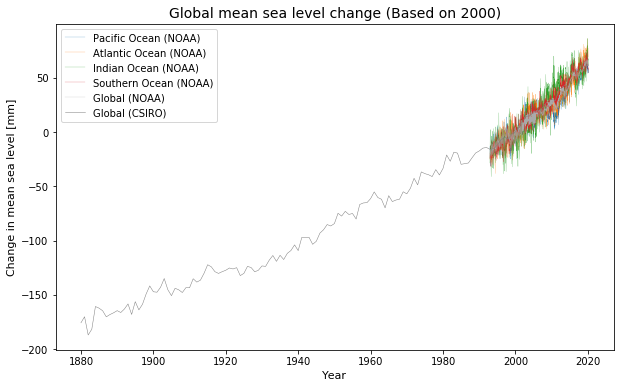

In [0]:
fig, ax = plt.subplots(figsize=[10,6])
txt2 = "Pacific Ocean (NOAA)"
ax.plot(pacific["year"], pacific["max_level"], linewidth=0.2, label=txt2)
txt3 = "Atlantic Ocean (NOAA)"
ax.plot(atlantic["year"], atlantic["max_level"], linewidth=0.2, label=txt3)
txt4 = "Indian Ocean (NOAA)"
ax.plot(indian["year"], indian["max_level"], linewidth=0.2, label=txt4)
txt5 = "Southern Ocean (NOAA)"
ax.plot(southern["year"], southern["max_level"], linewidth=0.2, label=txt5)
txt1 = "Global (NOAA)"
ax.plot(noaa["year"], noaa["max_level"], color="darkgrey", linewidth=0.2, label=txt1)
txt6 = "Global (CSIRO)"
ax.plot(csiro["year_int"], csiro["adjusted_min_level"], color="grey", linewidth=0.5, label=txt6)

xlab = ax.set_xlabel("Year", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [mm]", fontsize=11)
plt.title("Global mean sea level change (Based on 2000)", fontsize=14)
ax.legend()

### PART 4 - Standardize the data **(GGD: +13)**

You should now have two DataFrames, one holding the <u>global</u> NOAA data (we'll work with only the global data from now on) with columns called "year" and "max_level", and one holding the CSIRO data with columns called "year_int" and "adjusted_min_level".  As we did in class, we have to standardize this data for the SGD-based linear regression.

<b>Get the mean and standard deviation of "year" and "max_level" from the NOAA dataframe and the mean and standard deviation of the "year_int" and "adjusted_min_level" from the CSIRO dataframe. (GGD: -2 [missing means])</b>

In [0]:
print("standard deviation of 'year' is {0} and 'max_level' is {1}".format(round(np.std(noaa["year"]),2), round(np.std(noaa["max_level"]),2)))
print("standard deviation of 'year' is {0} and 'adjusted_min_level' is {1}".format(round(np.std(csiro["year_int"]),2), round(np.std(csiro["adjusted_min_level"]),2)))

standard deviation of 'year' is 7.18 and 'max_level' is 21.4
standard deviation of 'year' is 38.97 and 'adjusted_min_level' is 61.43


<b>Create columns in your NOAA dataframe called "year_st" and "max_level_st" that are standardized versions of "year" and "max_level".</b>

In [0]:
noaa ["year_st"] = (noaa["year"] - noaa["year"].mean()) / noaa["year"].std()
noaa ["max_level_st"] = (noaa["max_level"] - noaa["max_level"].mean()) / noaa["max_level"].std()
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level,year_st,max_level_st
0,1992.9614,-19.54,NaN,NaN,NaN,-19.54,-1.991123,-1.886274
1,1992.9865,-19.96,NaN,NaN,NaN,-19.96,-1.987629,-1.905892
2,1993.0123,-15.62,NaN,NaN,NaN,-15.62,-1.984036,-1.703172
3,1993.0407,-19.43,NaN,NaN,NaN,-19.43,-1.980082,-1.881136
4,1993.0660,-23.95,NaN,NaN,NaN,-23.95,-1.976559,-2.092263


 <b>Create columns in your CSIRO dataframe called "year_int_st" and "adjusted_min_level_st" that are standardized versions of "year_int" and "adjusted_min_level".</b>

In [0]:
csiro ["year_int_st"] = (csiro["year_int"] - csiro["year_int"].mean()) / csiro["year_int"].std()
csiro ["adjusted_min_level_st"] = (csiro["adjusted_min_level"] - csiro["adjusted_min_level"].mean()) / csiro["year_int"].std()
csiro.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int,year_int_st,adjusted_min_level_st
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782732,1880,-1.712888,-2.363205
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182732,1881,-1.687323,-2.220038
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982732,1882,-1.661757,-2.649539
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682732,1883,-1.636192,-2.514042
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782732,1884,-1.610626,-1.979723


<b>Make a plot of the standardized NOAA global data.</b>

No handles with labels found to put in legend.


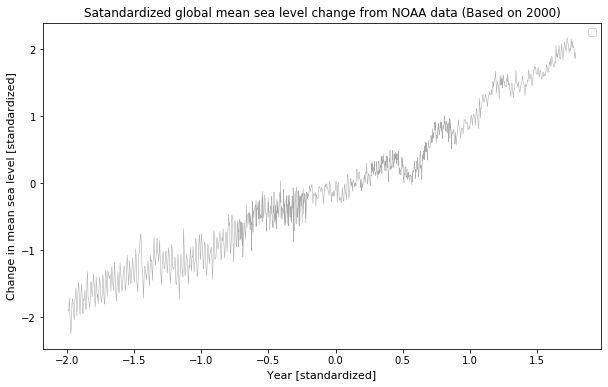

In [0]:
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(noaa["year_st"], noaa["max_level_st"], color="darkgrey", linewidth=0.5)

xlab = ax.set_xlabel("Year [standardized]", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [standardized]", fontsize=11)
plt.title("Satandardized global mean sea level change from NOAA data (Based on 2000)", fontsize=12)
ax.legend()

<b>Make a plot of the standardized CSIRO data.</b>

No handles with labels found to put in legend.


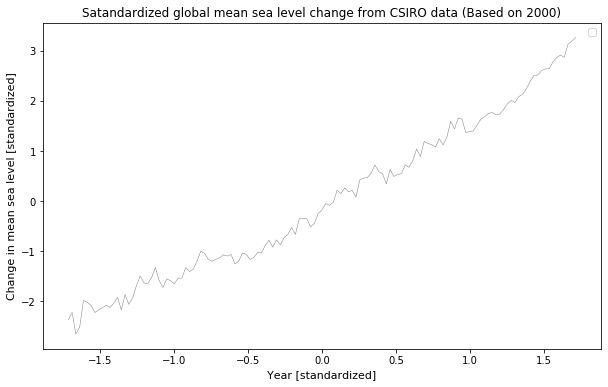

In [0]:
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(csiro["year_int_st"], csiro["adjusted_min_level_st"], color="grey", linewidth=0.5)

xlab = ax.set_xlabel("Year [standardized]", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [standardized]", fontsize=11)
plt.title("Satandardized global mean sea level change from CSIRO data (Based on 2000)", fontsize=12)
ax.legend()

### PART 5 - Fit and compare models between NOAA and CSIRO **(GGD: +27)**

<b>Import SGDRegressor from sklearn and run a regression model using the default parameters.</b>

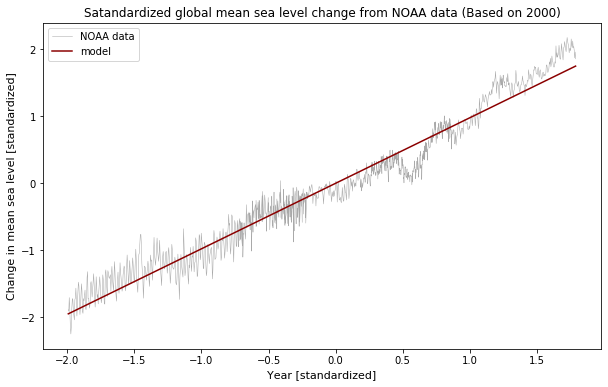

In [0]:
# Import SGDRegressor from sklearn
from sklearn.linear_model import SGDRegressor
lm_st = SGDRegressor()

#run a regression model using the default parameters.

# NOAA data sthandardized
year = noaa["year"].values
mlev = noaa["max_level"].values
noaa["year_st"] = (year - year.mean()) / year.std()
noaa["mlev_st"] = (mlev - mlev.mean()) / mlev.std()
year_st = noaa["year_st"].values
mlev_st = noaa["max_level_st"].values

# fit the standardized data
lm_st.fit(year_st.reshape(-1,1), mlev_st)
# check coefficient
lm_st.coef_

# "predict" the standardized data
model_st = lm_st.predict(year_st.reshape(-1,1))

# plot it
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(year_st, mlev_st, label="NOAA data", color="darkgrey", linewidth=0.5)
ax.plot(year_st, model_st, label="model", color="darkred")
xlab = ax.set_xlabel("Year [standardized]", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [standardized]", fontsize=11)
plt.title("Satandardized global mean sea level change from NOAA data (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

-- Epoch 1
Norm: 0.92, NNZs: 1, Bias: -0.004011, T: 1231, Avg. loss: 0.080903
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.97, NNZs: 1, Bias: 0.001716, T: 2462, Avg. loss: 0.022057
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 1, Bias: -0.000256, T: 3693, Avg. loss: 0.021606
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 1, Bias: 0.000198, T: 4924, Avg. loss: 0.021598
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 1, Bias: -0.000736, T: 6155, Avg. loss: 0.021586
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.98, NNZs: 1, Bias: -0.000150, T: 7386, Avg. loss: 0.021588
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.97, NNZs: 1, Bias: 0.000266, T: 8617, Avg. loss: 0.021584
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


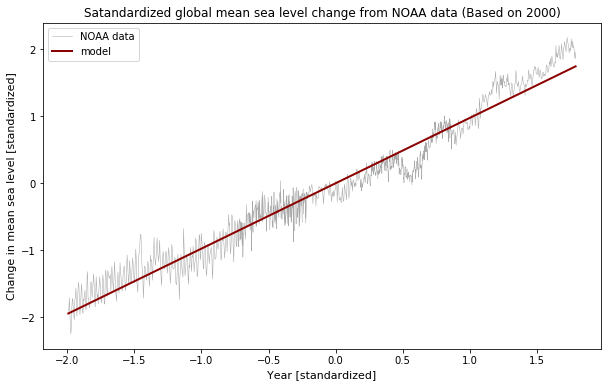

In [0]:
# Recheck: Check the cost for each step
lm_st = SGDRegressor(verbose=1)

# fit the standardized data
lm_st.fit(year_st.reshape(-1,1), mlev_st)

# predict the standardized data
model_st2 = lm_st.predict(year_st.reshape(-1,1))

# plot it 
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(year_st, mlev_st, "darkgrey", label="NOAA data", linewidth=0.5)
ax.plot(year_st, model_st2, "darkred", label="model", linewidth=2)
xlab = ax.set_xlabel("Year [standardized]", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [standardized]", fontsize=11)
plt.title("Satandardized global mean sea level change from NOAA data (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

<b>"Unstandardize" the model as we did in class by multiplying by the standard deviation and adding the avg of the unstandardized data set.</b>

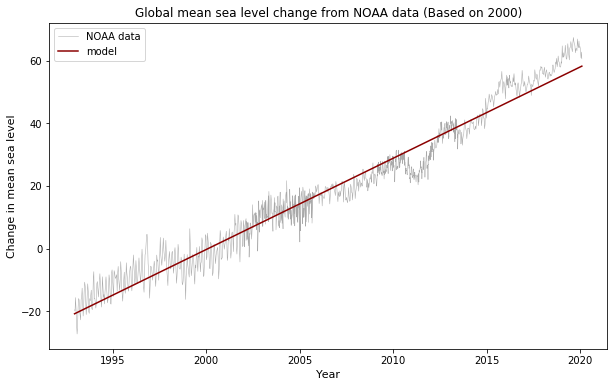

In [0]:
# Unstandardize the model so that it can be compared to the raw data

# "predict" the unstandardized data
model_ust = model_st * mlev.std() + mlev.mean()

# Plot it
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(year, mlev, "darkgrey", label="NOAA data", linewidth=0.5)
ax.plot(year, model_ust, "darkred", label="model")
xlab = ax.set_xlabel("Year", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level", fontsize=11)
plt.title("Global mean sea level change from NOAA data (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

<b>Assume that the error in each measurement is 2.5 mm, calculate the $\chi^2$ per degree of freedom for this model.</b>

In [0]:
# chisquare assuming the errors in the measurement are 2.5 mm 
err = 2.5
chisq = ((mlev - model_ust) **2 / err**2).sum()

# The degree of freedom is the number of data points minus the number of parameters in the model 
# (1 in this case, considered to be a good fit)
# Chisquare per degrees of freedom
ndata = len(mlev)
chisq_dof = chisq / (ndata - 1.0)
print("Chisquare is {0}, and therefore chisquare per degree of freeom for this model is {1}".format(round(chisq,2), round(chisq_dof, 2)))

Chisquare is 3889.82, and therefore chisquare per degree of freeom for this model is 3.16


<b>Overplot this model on the global data.</b>

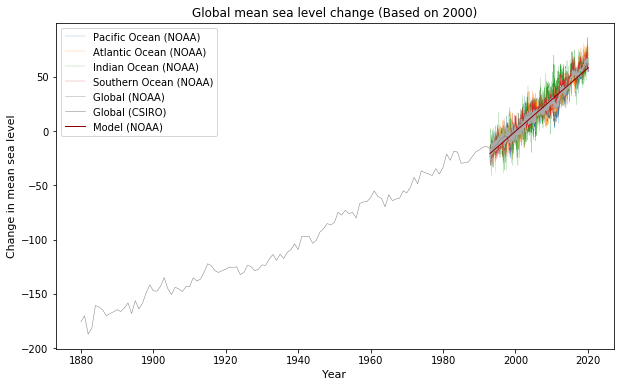

In [0]:
fig, ax = plt.subplots(figsize=[10,6])
txt2 = "Pacific Ocean (NOAA)"
ax.plot(pacific["year"], pacific["max_level"], linewidth=0.2, label=txt2)
txt3 = "Atlantic Ocean (NOAA)"
ax.plot(atlantic["year"], atlantic["max_level"], linewidth=0.2, label=txt3)
txt4 = "Indian Ocean (NOAA)"
ax.plot(indian["year"], indian["max_level"], linewidth=0.2, label=txt4)
txt5 = "Southern Ocean (NOAA)"
ax.plot(southern["year"], southern["max_level"], linewidth=0.2, label=txt5)
txt1 = "Global (NOAA)"
ax.plot(year, mlev,color="darkgrey", linewidth=0.5, label=txt1)
txt6 = "Global (CSIRO)"
ax.plot(csiro["year_int"], csiro["adjusted_min_level"], color="grey", linewidth=0.5, label=txt6)
txt7 = "Model (NOAA)"
ax.plot(year, model_ust, color="darkred", linewidth=1, label=txt7)

xlab = ax.set_xlabel("Year", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level", fontsize=11)
plt.title("Global mean sea level change (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

<b>Fit an SGDRegressor model to the standardized CSIRO data, "un-standardize" the model, and calculate the $\chi^2$ per degree of freedom for this model assuming the errors are 3.9 mm.</b>

In [0]:
csiro

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int,year_int_st,adjusted_min_level_st
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782732,1880,-1.712888,-2.363205
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182732,1881,-1.687323,-2.220038
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982732,1882,-1.661757,-2.649539
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682732,1883,-1.636192,-2.514042
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782732,1884,-1.610626,-1.979723
...,...,...,...,...,...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973,8.122973,30.540771,2010,1.610626,2.911558
131,2011-03-15,8.964567,8.661417,9.267717,8.053065,8.053065,28.765119,2011,1.636192,2.866163
132,2012-03-15,9.326772,8.992126,9.661417,8.457058,8.457058,39.026532,2012,1.661757,3.128501
133,2013-03-15,8.980315,8.622047,9.338583,8.546648,8.546648,41.302133,2013,1.687323,3.186678


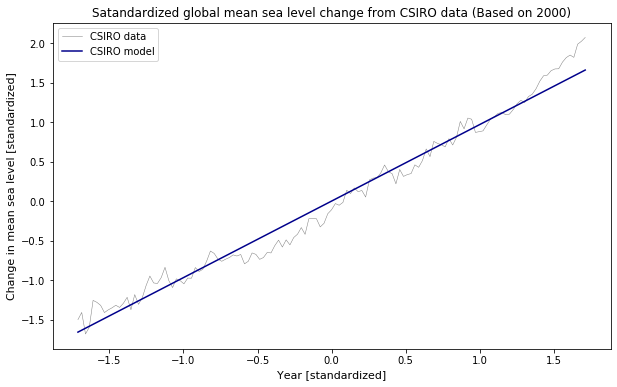

In [0]:
# CSIRO data sthandardized
year_int = csiro["year_int"]
aminlev = csiro["adjusted_min_level"]
csiro["year_int_st"] = (year_int - year_int.mean()) / year_int.std()
csiro["aminlev_st"] = (aminlev - aminlev.mean()) / aminlev.std()
year_int_st = csiro["year_int_st"].values
aminlev_st = csiro["aminlev_st"].values

# fit the standardized data
lm_stc = SGDRegressor()
lm_stc.fit(year_int_st.reshape(-1,1), aminlev_st)
# check coefficient
lm_stc.coef_

# "predict" the standardized data
model_stc = lm_stc.predict(year_int_st.reshape(-1,1))
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(year_int_st, aminlev_st, label="CSIRO data", color="grey", linewidth=0.5)
ax.plot(year_int_st, model_stc, label="CSIRO model", color="darkblue")
xlab = ax.set_xlabel("Year [standardized]", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [standardized]", fontsize=11)
plt.title("Satandardized global mean sea level change from CSIRO data (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

-- Epoch 1
Norm: 0.41, NNZs: 1, Bias: -0.009956, T: 135, Avg. loss: 0.289074
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 1, Bias: -0.007240, T: 270, Avg. loss: 0.129614
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 1, Bias: -0.005076, T: 405, Avg. loss: 0.071408
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.77, NNZs: 1, Bias: -0.003690, T: 540, Avg. loss: 0.043903
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.82, NNZs: 1, Bias: -0.003161, T: 675, Avg. loss: 0.029649
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.86, NNZs: 1, Bias: -0.002596, T: 810, Avg. loss: 0.021855
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.89, NNZs: 1, Bias: -0.001667, T: 945, Avg. loss: 0.017440
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.91, NNZs: 1, Bias: -0.001251, T: 1080, Avg. loss: 0.014857
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.93, NNZs: 1, Bias: -0.001208, T: 1215, Avg. loss: 0.013312
Total training time: 0.01

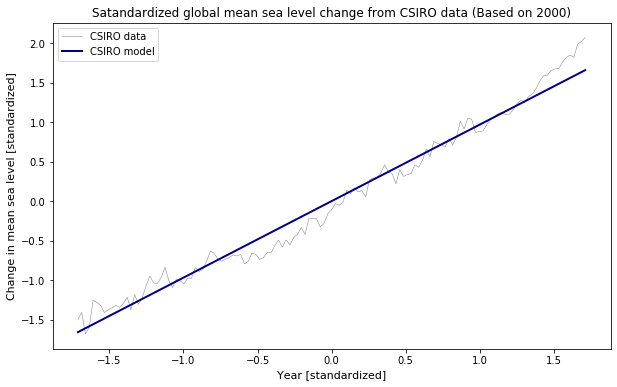

In [0]:
# Recheck: Check the cost (loss) for each step
lm_stc2 = SGDRegressor(verbose=1)
# fit the standardized data
lm_stc2.fit(year_int_st.reshape(-1,1), aminlev_st)
# predict the standardized data
model_stc2 = lm_stc2.predict(year_int_st.reshape(-1,1))

# plot it
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(year_int_st, aminlev_st, "grey", label="CSIRO data", linewidth=0.5)
ax.plot(year_int_st, model_stc2, "darkblue", label="CSIRO model", linewidth=2)
xlab = ax.set_xlabel("Year [standardized]", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [standardized]", fontsize=11)
plt.title("Satandardized global mean sea level change from CSIRO data (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

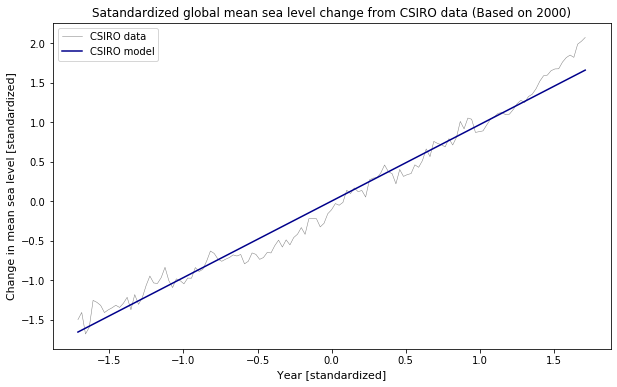

In [0]:
# CSIRO data sthandardized
year_int = csiro["year_int"]
aminlev = csiro["adjusted_min_level"]
csiro["year_int_st"] = (year_int - year_int.mean()) / year_int.std()
csiro["aminlev_st"] = (aminlev - aminlev.mean()) / aminlev.std()
year_int_st = csiro["year_int_st"].values
aminlev_st = csiro["aminlev_st"].values

# fit the standardized data
lm_stc = SGDRegressor()
lm_stc.fit(year_int_st.reshape(-1,1), aminlev_st)
# check coefficient
lm_stc.coef_

# "predict" the standardized data
model_stc = lm_stc.predict(year_int_st.reshape(-1,1))
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(year_int_st, aminlev_st, label="CSIRO data", color="grey", linewidth=0.5)
ax.plot(year_int_st, model_stc, label="CSIRO model", color="darkblue")
xlab = ax.set_xlabel("Year [standardized]", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level [standardized]", fontsize=11)
plt.title("Satandardized global mean sea level change from CSIRO data (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

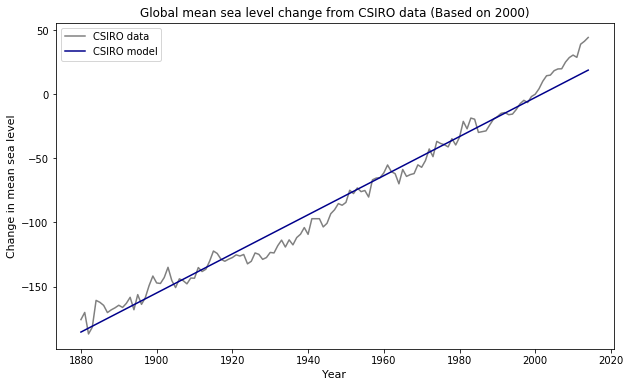

In [0]:
# Unstandardize the model so that it can be compared to the raw data
model_ustc = model_stc * aminlev.std() + aminlev.mean()

# Recheck - Plot it
fig, ax = plt.subplots(figsize=[10,6])
ax.plot(year_int, aminlev, "grey", label="CSIRO data")
ax.plot(year_int, model_ustc, "darkblue", label="CSIRO model")
xlab = ax.set_xlabel("Year", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level", fontsize=11)
plt.title("Global mean sea level change from CSIRO data (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

In [0]:
# Chisquare assuming the measurement are 3.9 mm
errc = 3.9
chisqc = ((aminlev - model_ustc) **2 / errc**2).sum()

# The degree of freeom is the number of data points minus the number of parameters in the model
# (1 in this cass, considered to be a good fit)
# Chisquare per degrees of freedom
ndatac = len(aminlev)
chisq_dofc = chisqc / (ndatac - 1.0)
print("Chisquare is {0}, and therefore chisquare per degree of freeom for this model is {1}".format(round(chisqc,2), round(chisq_dofc, 2)))

Chisquare is 738.08, and therefore chisquare per degree of freeom for this model is 5.51


<b>Overplot this model on the CSIRO data.</b>

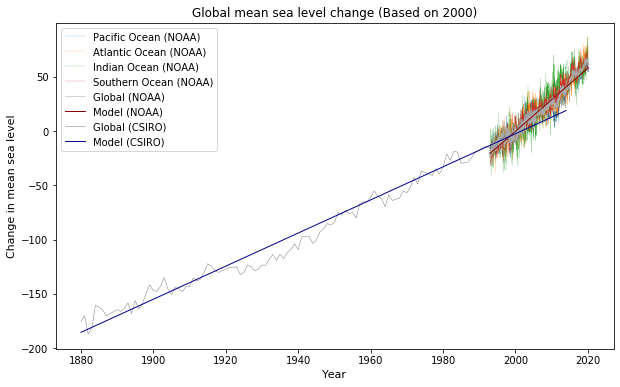

In [0]:
fig, ax = plt.subplots(figsize=[10,6])
txt2 = "Pacific Ocean (NOAA)"
ax.plot(pacific["year"], pacific["max_level"], linewidth=0.2, label=txt2)
txt3 = "Atlantic Ocean (NOAA)"
ax.plot(atlantic["year"], atlantic["max_level"], linewidth=0.2, label=txt3)
txt4 = "Indian Ocean (NOAA)"
ax.plot(indian["year"], indian["max_level"], linewidth=0.2, label=txt4)
txt5 = "Southern Ocean (NOAA)"
ax.plot(southern["year"], southern["max_level"], linewidth=0.2, label=txt5)
txt1 = "Global (NOAA)"
ax.plot(year, mlev,color="darkgrey", linewidth=0.5, label=txt1)
txt7 = "Model (NOAA)"
ax.plot(year, model_ust, color="darkred", linewidth=1, label=txt7)
txt6 = "Global (CSIRO)"
ax.plot(csiro["year_int"], csiro["adjusted_min_level"], color="grey", linewidth=0.5, label=txt6)
txt8 = "Model (CSIRO)"
ax.plot(year_int, model_ustc, color="darkblue", linewidth=1, label=txt8)


xlab = ax.set_xlabel("Year", fontsize=11)
ylab = ax.set_ylabel("Change in mean sea level", fontsize=11)
plt.title("Global mean sea level change (Based on 2000)", fontsize=12)
ax.legend()
fig.show()

<b>Comment on the above plots by answering the following questions:  Which data is better fit by a linear model?  Why do you think that is?  What are the rates of sea level rise for each model?  What are the predictions for each model for sea level in 2100?  What approximations have we made that may or may not be accurate? (GGD: -3 [see solutions for sea level rise rates and predictions for 2100)</b>

*This graph is showing the global mean sea level change based on 2000 from 1880 to 2020. The data is collected from NOAA and CSIRO websites. NOAA data is collected from TOPEX/Poseidon, Jason-1, Jason-2 and Jason3. CSIRO data is "a combination of long-term tide gauge measurements and recent statellite measurements". As shown above, a slope of NOAA regression model line is higher than a slope of CIRO regression model line.* 

**Which data is better fit by a linear model?** 
*A model based on NOAA data is better fit by a linear model.* 

**Why do you think that is?**
*It is because intervals between line and data are smaller in NOAA data, which of the error is smaller than that of CSIRO data. Note that NOAA's chisquare error was assumed as 2.5 and CSiRO's chisquare error was assumed as 3.9, and the result was shown as below. The chisquare per degree of freedom is a reasonable way to compare model fits. Therefore, NOAA's linear model expresses therelationship between those points better.* 

In [0]:
print("NOAA: Chisquare is {0}, and therefore chisquare per degree of freedom for this model is {1}".format(round(chisq,2), round(chisq_dof, 2)))
print("CSIRO: Chisquare is {0}, and therefore chisquare per degree of freedom for this model is {1}".format(round(chisqc,2), round(chisq_dofc, 2)))

NOAA: Chisquare is 3889.82, and therefore chisquare per degree of freedom for this model is 3.16
CSIRO: Chisquare is 738.08, and therefore chisquare per degree of freedom for this model is 5.51


In [0]:
# For fun! Check chi-squared test
import scipy as sp
print("Chi-squared test for NOAA model: {0}".format(sp.stats.chisquare(model_ust, f_exp=None)))
print("Chi-squared test for CSIRO model: {0}".format(sp.stats.chisquare(model_ustc, f_exp=None)))

Chi-squared test for NOAA model: Power_divergenceResult(statistic=25804.56201264418, pvalue=0.0)
Chi-squared test for CSIRO model: Power_divergenceResult(statistic=-5718.0626135982475, pvalue=1.0)


**What are the rates of sea level rise for each model?**

In [0]:
# Case 1: using SGDRegressor

from sklearn.linear_model import SGDRegressor

# NOAA data 
year_st = noaa["year_st"].values
mlev_st = noaa["mlev_st"].values
lmn = SGDRegressor()
lmn.fit(year_st.reshape(-1,1), mlev_st)
model_st = lmn.predict(year_st.reshape(-1,1))
model_ust = model_st * mlev.std() + mlev.mean()
raten = lmn.coef_ * mlev.std() + mlev.mean()
print(raten)

# CSIRO data 
year_int_st = csiro["year_int_st"].values
aminlev_st = csiro["adjusted_min_level_st"].values
lmc = SGDRegressor()
lmc.fit(year_int_st.reshape(-1,1), aminlev_st)
model_stc = lm.predict(year_int_st.reshape(-1,1))
model_ustc = model_stc * aminlev.std() + aminlev.mean()
ratec = lmc.coef_ * aminlev.std() + aminlev.mean()
print(ratec)

print("The rates of sea level rise from NOAA data is {0} mm/yr and from CSIRO data is {1} mm/yr".format(41, 11))

[41.82748579]
[11.39452733]
The rates of sea level rise from NOAA data is 41 mm/yr and from CSIRO data is 11 mm/yr


In [0]:
# Case 2: Using numpy

model_ust = model_st * mlev.std() + mlev.mean()
nform = np.polyfit(year, model_ust, 1)
print(nform)

model_ustc = model_stc * aminlev.std() + aminlev.mean()
cform = np.polyfit(year_int, model_ustc, 1)
print(cform)
print("The rates of sea level rise from NOAA data is {0} mm/yr and from CSIRO data is {1} mm/yr".format(2.9, 1.5))

[ 2.92309131e+00 -5.84655706e+03]
[ 1.77350417e+12 -3.45303024e+15]
The rates of sea level rise from NOAA data is 2.9 mm/yr and from CSIRO data is 1.5 mm/yr


**What are the predictions for each model for sea level in 2100?**

In [0]:
# Case 2: Using numpy
nform = np.poly1d(nform)
nform
n2100 = nform(2100)
cform = np.poly1d(cform)
cform
c2100 = cform(2100)
print("The predictions for sea level change in 2100 based on 2000 from NOAA data is {0} mm and  from CSIRO data is {1} mm".format(round(n2100, 0), round(c2100,0)))

The predictions for sea level change in 2100 based on 2000 from NOAA data is 292.0 mm and  from CSIRO data is 271328525419094.0 mm


**What approximations have we made that may or may not be accurate?**

*The CSIRO prediction model may be accurate. Accrding to IPCC (2018), "By 2100, global mean sea level rise is projected to be around 0.1 metre lower (100 mm) with global warming of 1.5°C compared to 2°C". Based on the NOAA and CSIRO data, the predictions for each model for sea level in 2100 are analyzed below and the result is showing that the CSIRO model prediction is closer to 100 mm than the NOAA model prediction.*

*However, there are several approximations which may not be accurate. First, the prediction above is based on an assumption that the ratse of sea level will be sustained at the current rate. However, there is a possibility that the raste of sea level rise is acclerated after 2020 if carbon emissions is more increased in the world. Therefore, the result of the predictions for each model for sea level in 2100 can be increased. Second, the data used in analysis is not enough. Note that NOAA's raw data is from 1992 to 2020 and CSIRO's raw data is from 1880 to 2014 and a way of merging data for each data model was different by people and situations which can cause differnt result anytime.*

**Reference:**
IPCC, 2018: Summary for Policymakers. In: Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty
